## CS5228 Tutorial 4 notebook

In [14]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [91]:
heart = pd.read_csv('heart.csv')
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [92]:
X, y = heart[['Age','MaxHR']].to_numpy(), heart[['HeartDisease']].to_numpy().squeeze()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Fit an unregularized logistic regression model:

In [103]:
logit1 = LogisticRegression(max_iter = 5000).fit(X_train, y_train)
print("Bias: {} coefficients: {}".format(logit1.intercept_,logit1.coef_))
print('Train accuracy: {}'.format((logit1.predict(X_train) == y_train).mean()))
print('Test accuracy: {}'.format((logit1.predict(X_test) == y_test).mean()))

Bias: [0.22287796] coefficients: [[ 0.25896613 -0.85979068]]
Train accuracy: 0.6907356948228883
Test accuracy: 0.6793478260869565


Standardize variables and re-fit model:

In [104]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [105]:
logit1 = LogisticRegression(max_iter = 5000).fit(X_train, y_train)
print("Bias: {} coefficients: {}".format(logit1.intercept_,logit1.coef_))
print('Train accuracy: {}'.format((logit1.predict(X_train) == y_train).mean()))
print('Test accuracy: {}'.format((logit1.predict(X_test) == y_test).mean()))

Bias: [0.22287796] coefficients: [[ 0.25896613 -0.85979068]]
Train accuracy: 0.6907356948228883
Test accuracy: 0.6793478260869565


Fit a 4th order polynomial (with interactions) logistic regression model (with `penalty='none'` and `max_iter = 5000`).

In [53]:
X_train.shape

(734, 2)

In [107]:
poly = PolynomialFeatures(degree=4,include_bias=False).fit(X_train)
X_train4 = poly.transform(X_train)
X_test4 = poly.transform(X_test)
logit4 = LogisticRegression(penalty='none', max_iter = 5000).fit(X_train4, y_train)
print("Bias: {} coefficients: {}".format(logit4.intercept_,logit4.coef_))
print('Train accuracy: {}'.format((logit4.predict(X_train4) == y_train).mean()))
print('Test accuracy: {}'.format((logit4.predict(X_test4) == y_test).mean()))

Bias: [0.07909586] coefficients: [[ 0.43199194 -1.28110548  0.23422915 -0.08982772  0.02954649 -0.13500952
   0.0961067   0.28369761  0.21925001 -0.02805831  0.06816102 -0.01430222
   0.00788476  0.01204044]]
Train accuracy: 0.7002724795640327
Test accuracy: 0.6630434782608695


The code below computes the predictions over a 2d grid, and uses this to visualize the output of the model:

In [115]:
n = 400

x1 = np.linspace(np.min(X_train[:,0]), np.max(X_train[:,1]), n)
x2 = np.linspace(np.min(X_train[:,0]), np.max(X_train[:,1]), n)
x1v, x2v = np.meshgrid(x1, x2)

X = np.c_[x1v.ravel(), x2v.ravel()]
yhat1 = logit1.predict(X)

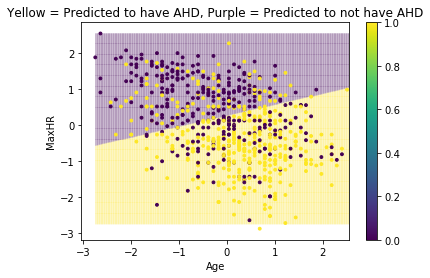

In [112]:
plt.pcolormesh(x1v, x2v, yhat1.reshape(x1v.shape),alpha = 0.05) 
plt.scatter(X_train[:,0],X_train[:,1],c=y_train, s=8)
plt.ylabel("MaxHR")
plt.xlabel("Age")
plt.title("Yellow = Predicted to have AHD, Purple = Predicted to not have AHD")
plt.colorbar()
plt.show()

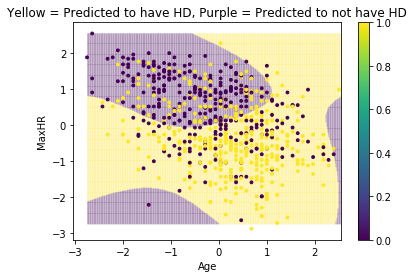

In [118]:
X_dummy = PolynomialFeatures(degree=4,include_bias=False).fit_transform(X)
yhat4 = logit4.predict(X_dummy)

plt.pcolormesh(x1v, x2v, yhat4.reshape(x1v.shape),alpha = 0.05) 
plt.scatter(X_train[:,0],X_train[:,1],c=y_train, s=8)
plt.ylabel("MaxHR")
plt.xlabel("Age")
plt.title("Yellow = Predicted to have HD, Purple = Predicted to not have HD")
plt.colorbar()
plt.show()


Compare the two models above on how they create the classification boundary.  Which is more likely to be overfit?  How would regularization affect these boundaries?